In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [4]:
test_df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [5]:
train_df.shape

(17176, 14)

In [6]:
test_df.shape

(8576, 13)

# Column meaning

|Column | Meaning
|---|---|
|tripid  |Trip ID|
|additional_fare |  Additional fare charged in rupees|
|duration| Duration of the trip in seconds from trip-start to trip-end|
|meter_waiting| Duration in seconds indicating the total time the vehicle was immobile from trip-start to trip-end|
|meter_waiting_fare| Fare for the time the vehicle was stopped within trip-start to trip-end duration. This may be due to traffic or other reason ex: stop at supermarket|
|meter_waiting_till_pickup| Time between trip-accept to trip-start|
|pickup_time| Date and time at pickup|
|drop_time| Date and time at drop off|
|pick_lat| Pickup latitude|
|pick_lon| Pickup longitude|
|drop_lat| Drop latitude|
|drop_lon| Drop longitudefare Trip fare|
|label| Label indicating if it is a correct or incorrect trip fare|


## Check missing values

In [7]:
train_df.isna().any()

tripid                       False
additional_fare               True
duration                      True
meter_waiting                 True
meter_waiting_fare            True
meter_waiting_till_pickup     True
pickup_time                  False
drop_time                    False
pick_lat                     False
pick_lon                     False
drop_lat                     False
drop_lon                     False
fare                          True
label                        False
dtype: bool

In [10]:
train_df.isna().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

Missing values for additional_fare, duration, meter_waiting, meter_waiting_fare, meter_waiting_till_pickup are in the same row. Probably intentially dropped?

In [18]:
train_df[train_df['additional_fare'].isna() & train_df['duration'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting_fare'].isna() & train_df['meter_waiting_till_pickup'].isna()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
31,189164831,NaN,NaN,NaN,NaN,NaN,11/1/2019 9:17,11/1/2019 9:25,7.27586,80.6136,7.28810,80.6319,NaN,incorrect
91,189231599,NaN,NaN,NaN,NaN,NaN,11/1/2019 14:48,11/1/2019 15:03,7.04783,79.8973,7.05307,79.9188,196.50,incorrect
253,189393356,NaN,NaN,NaN,NaN,NaN,11/2/2019 13:29,11/2/2019 13:55,7.21158,79.8401,7.20136,79.8455,188.71,incorrect
811,190066074,NaN,NaN,NaN,NaN,NaN,11/5/2019 16:49,11/5/2019 17:01,7.48201,80.3580,7.50463,80.3510,NaN,incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16994,213449192,NaN,NaN,NaN,NaN,NaN,1/30/2020 22:52,1/30/2020 23:05,6.88183,79.8577,6.84729,79.8734,NaN,incorrect
17033,213510465,NaN,NaN,NaN,NaN,NaN,1/31/2020 10:03,1/31/2020 10:04,6.92600,79.8681,6.92596,79.8679,NaN,incorrect
17052,213538831,NaN,NaN,NaN,NaN,NaN,1/31/2020 11:53,1/31/2020 13:09,6.70807,79.9125,6.70815,79.9127,NaN,incorrect
17123,213674502,NaN,NaN,NaN,NaN,NaN,1/31/2020 16:46,1/31/2020 17:59,6.87969,79.8597,6.97458,79.9380,NaN,incorrect


Most of the missing values for fair have missing values for other missing column however few have values for other missing columns 

In [20]:
train_df[train_df['additional_fare'].isna() & train_df['duration'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting_fare'].isna() & train_df['meter_waiting_till_pickup'].isna() & train_df['fare'].isna()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
31,189164831,NaN,NaN,NaN,NaN,NaN,11/1/2019 9:17,11/1/2019 9:25,7.27586,80.6136,7.28810,80.6319,NaN,incorrect
811,190066074,NaN,NaN,NaN,NaN,NaN,11/5/2019 16:49,11/5/2019 17:01,7.48201,80.3580,7.50463,80.3510,NaN,incorrect
861,190111701,NaN,NaN,NaN,NaN,NaN,11/5/2019 21:13,11/5/2019 21:15,7.03357,79.9238,7.03365,79.9238,NaN,incorrect
894,190144719,NaN,NaN,NaN,NaN,NaN,11/6/2019 7:39,11/6/2019 7:40,6.87554,79.8973,6.87573,79.8965,NaN,incorrect
1024,190243365,NaN,NaN,NaN,NaN,NaN,11/6/2019 17:23,11/6/2019 17:47,6.90195,79.8942,6.89726,79.8698,NaN,incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16994,213449192,NaN,NaN,NaN,NaN,NaN,1/30/2020 22:52,1/30/2020 23:05,6.88183,79.8577,6.84729,79.8734,NaN,incorrect
17033,213510465,NaN,NaN,NaN,NaN,NaN,1/31/2020 10:03,1/31/2020 10:04,6.92600,79.8681,6.92596,79.8679,NaN,incorrect
17052,213538831,NaN,NaN,NaN,NaN,NaN,1/31/2020 11:53,1/31/2020 13:09,6.70807,79.9125,6.70815,79.9127,NaN,incorrect
17123,213674502,NaN,NaN,NaN,NaN,NaN,1/31/2020 16:46,1/31/2020 17:59,6.87969,79.8597,6.97458,79.9380,NaN,incorrect


In [23]:
train_df[~(train_df['additional_fare'].isna() & train_df['duration'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting'].isna() & train_df['meter_waiting_fare'].isna() & train_df['meter_waiting_till_pickup'].isna()) & train_df['fare'].isna()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
20,189157607,10.5,2956.0,1686.0,97.450800,29.0,11/1/2019 8:40,11/1/2019 9:21,6.92109,79.8547,6.94120,79.8588,NaN,incorrect
30,189164806,10.5,3549.0,2689.0,146.985400,69.0,11/1/2019 9:16,11/1/2019 9:29,6.91657,79.8593,6.89258,79.8554,NaN,incorrect
1924,191263471,5.0,39.0,19.0,1.107700,0.0,11/11/2019 11:00,11/11/2019 11:09,6.93940,79.8756,6.93693,79.8641,NaN,incorrect
2700,192182656,5.0,23.0,23.0,1.340900,0.0,11/15/2019 14:31,11/15/2019 14:35,6.87287,79.8908,6.87959,79.8911,NaN,incorrect
11952,206984071,10.5,1585.0,833.0,48.147400,169.0,1/4/2020 15:05,1/4/2020 15:18,6.91742,79.8550,6.93338,79.8548,NaN,incorrect
13544,209203396,10.5,2423.0,1905.0,110.162896,23.0,1/13/2020 13:03,1/13/2020 13:15,6.91742,79.8550,6.92723,79.8452,NaN,incorrect


In [8]:
test_df.isna().any()

tripid                       False
additional_fare              False
duration                     False
meter_waiting                False
meter_waiting_fare           False
meter_waiting_till_pickup    False
pickup_time                  False
drop_time                    False
pick_lat                     False
pick_lon                     False
drop_lat                     False
drop_lon                     False
fare                         False
dtype: bool

# Label distribution

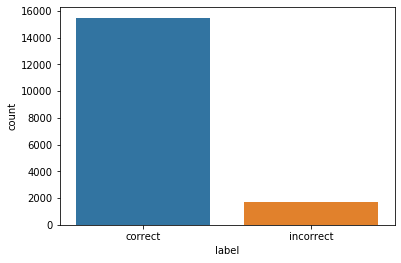

In [24]:
sns.countplot(x='label', data=train_df)

### Distribution for missing values

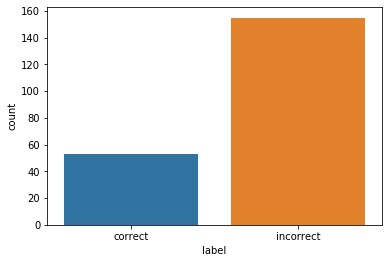

In [27]:
sns.countplot(x='label', data=train_df[train_df['additional_fare'].isna() | train_df['fare'].isna()])

### Distribution after dropping missing values

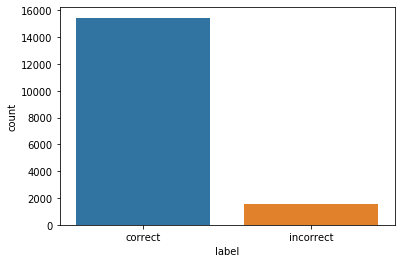

In [51]:
sns.countplot(x='label', data=train_df.dropna())

# Check for data leaks

In [32]:
pd.merge(train_df, test_df, on=['tripid'],how='inner')

,tripid,additional_fare_x,duration_x,meter_waiting_x,meter_waiting_fare_x,meter_waiting_till_pickup_x,pickup_time_x,drop_time_x,pick_lat_x,pick_lon_x,...,meter_waiting_y,meter_waiting_fare_y,meter_waiting_till_pickup_y,pickup_time_y,drop_time_y,pick_lat_y,pick_lon_y,drop_lat_y,drop_lon_y,fare_y


# Data distribution

## Data correlations

In [46]:
data = train_df.dropna().drop(['tripid'],axis=1)
data.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [41]:
data.corr()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
additional_fare,1.000000,-0.000774,0.197606,0.199606,0.002352,0.009120,0.000612,0.004642,0.001532,0.315285
duration,-0.000774,1.000000,0.969788,0.968667,0.040577,-0.027081,-0.025590,-0.015969,-0.013603,0.865256
meter_waiting,0.197606,0.969788,1.000000,0.999474,0.030450,-0.016167,-0.014196,-0.010114,-0.007895,0.870126
meter_waiting_fare,0.199606,0.968667,0.999474,1.000000,0.029911,-0.015009,-0.012467,-0.009426,-0.006794,0.865073
meter_waiting_till_pickup,0.002352,0.040577,0.030450,0.029911,1.000000,0.011381,0.016483,0.006942,0.011047,0.045468
pick_lat,0.009120,-0.027081,-0.016167,-0.015009,0.011381,1.000000,0.519962,0.558312,0.336847,-0.024726
pick_lon,0.000612,-0.025590,-0.014196,-0.012467,0.016483,0.519962,1.000000,0.304976,0.651794,-0.035472
drop_lat,0.004642,-0.015969,-0.010114,-0.009426,0.006942,0.558312,0.304976,1.000000,-0.420574,-0.015615
drop_lon,0.001532,-0.013603,-0.007895,-0.006794,0.011047,0.336847,0.651794,-0.420574,1.000000,-0.014981
fare,0.315285,0.865256,0.870126,0.865073,0.045468,-0.024726,-0.035472,-0.015615,-0.014981,1.000000


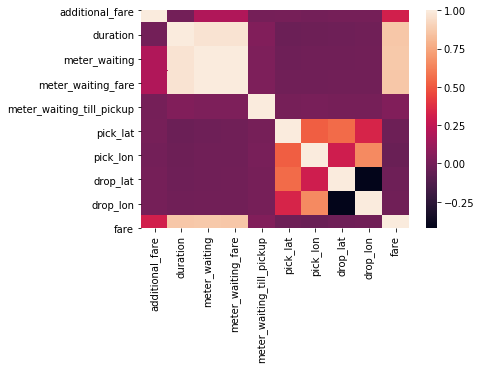

In [44]:
corr = data.corr()
# fig, ax = plt.subplots(figsize=(10,10))
# plt.xticks(range(len(corr.columns)), corr.columns)
# plt.yticks(range(len(corr.columns)), corr.columns)
# ax.matshow(corr)
sns.heatmap(corr)

## Lattitude longitude data

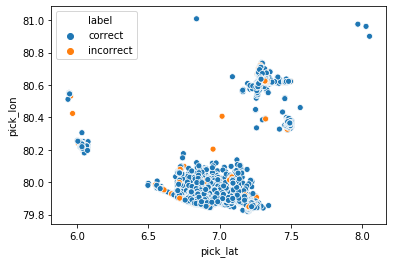

In [47]:
sns.scatterplot(x='pick_lat',y='pick_lon',data=data,hue='label')

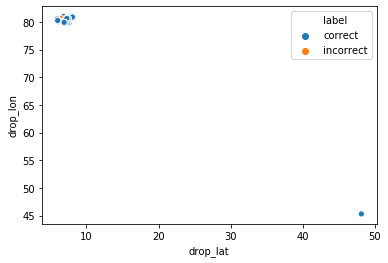

In [48]:
sns.scatterplot(x='drop_lat',y='drop_lon',data=data,hue='label')

## Continious value distribution

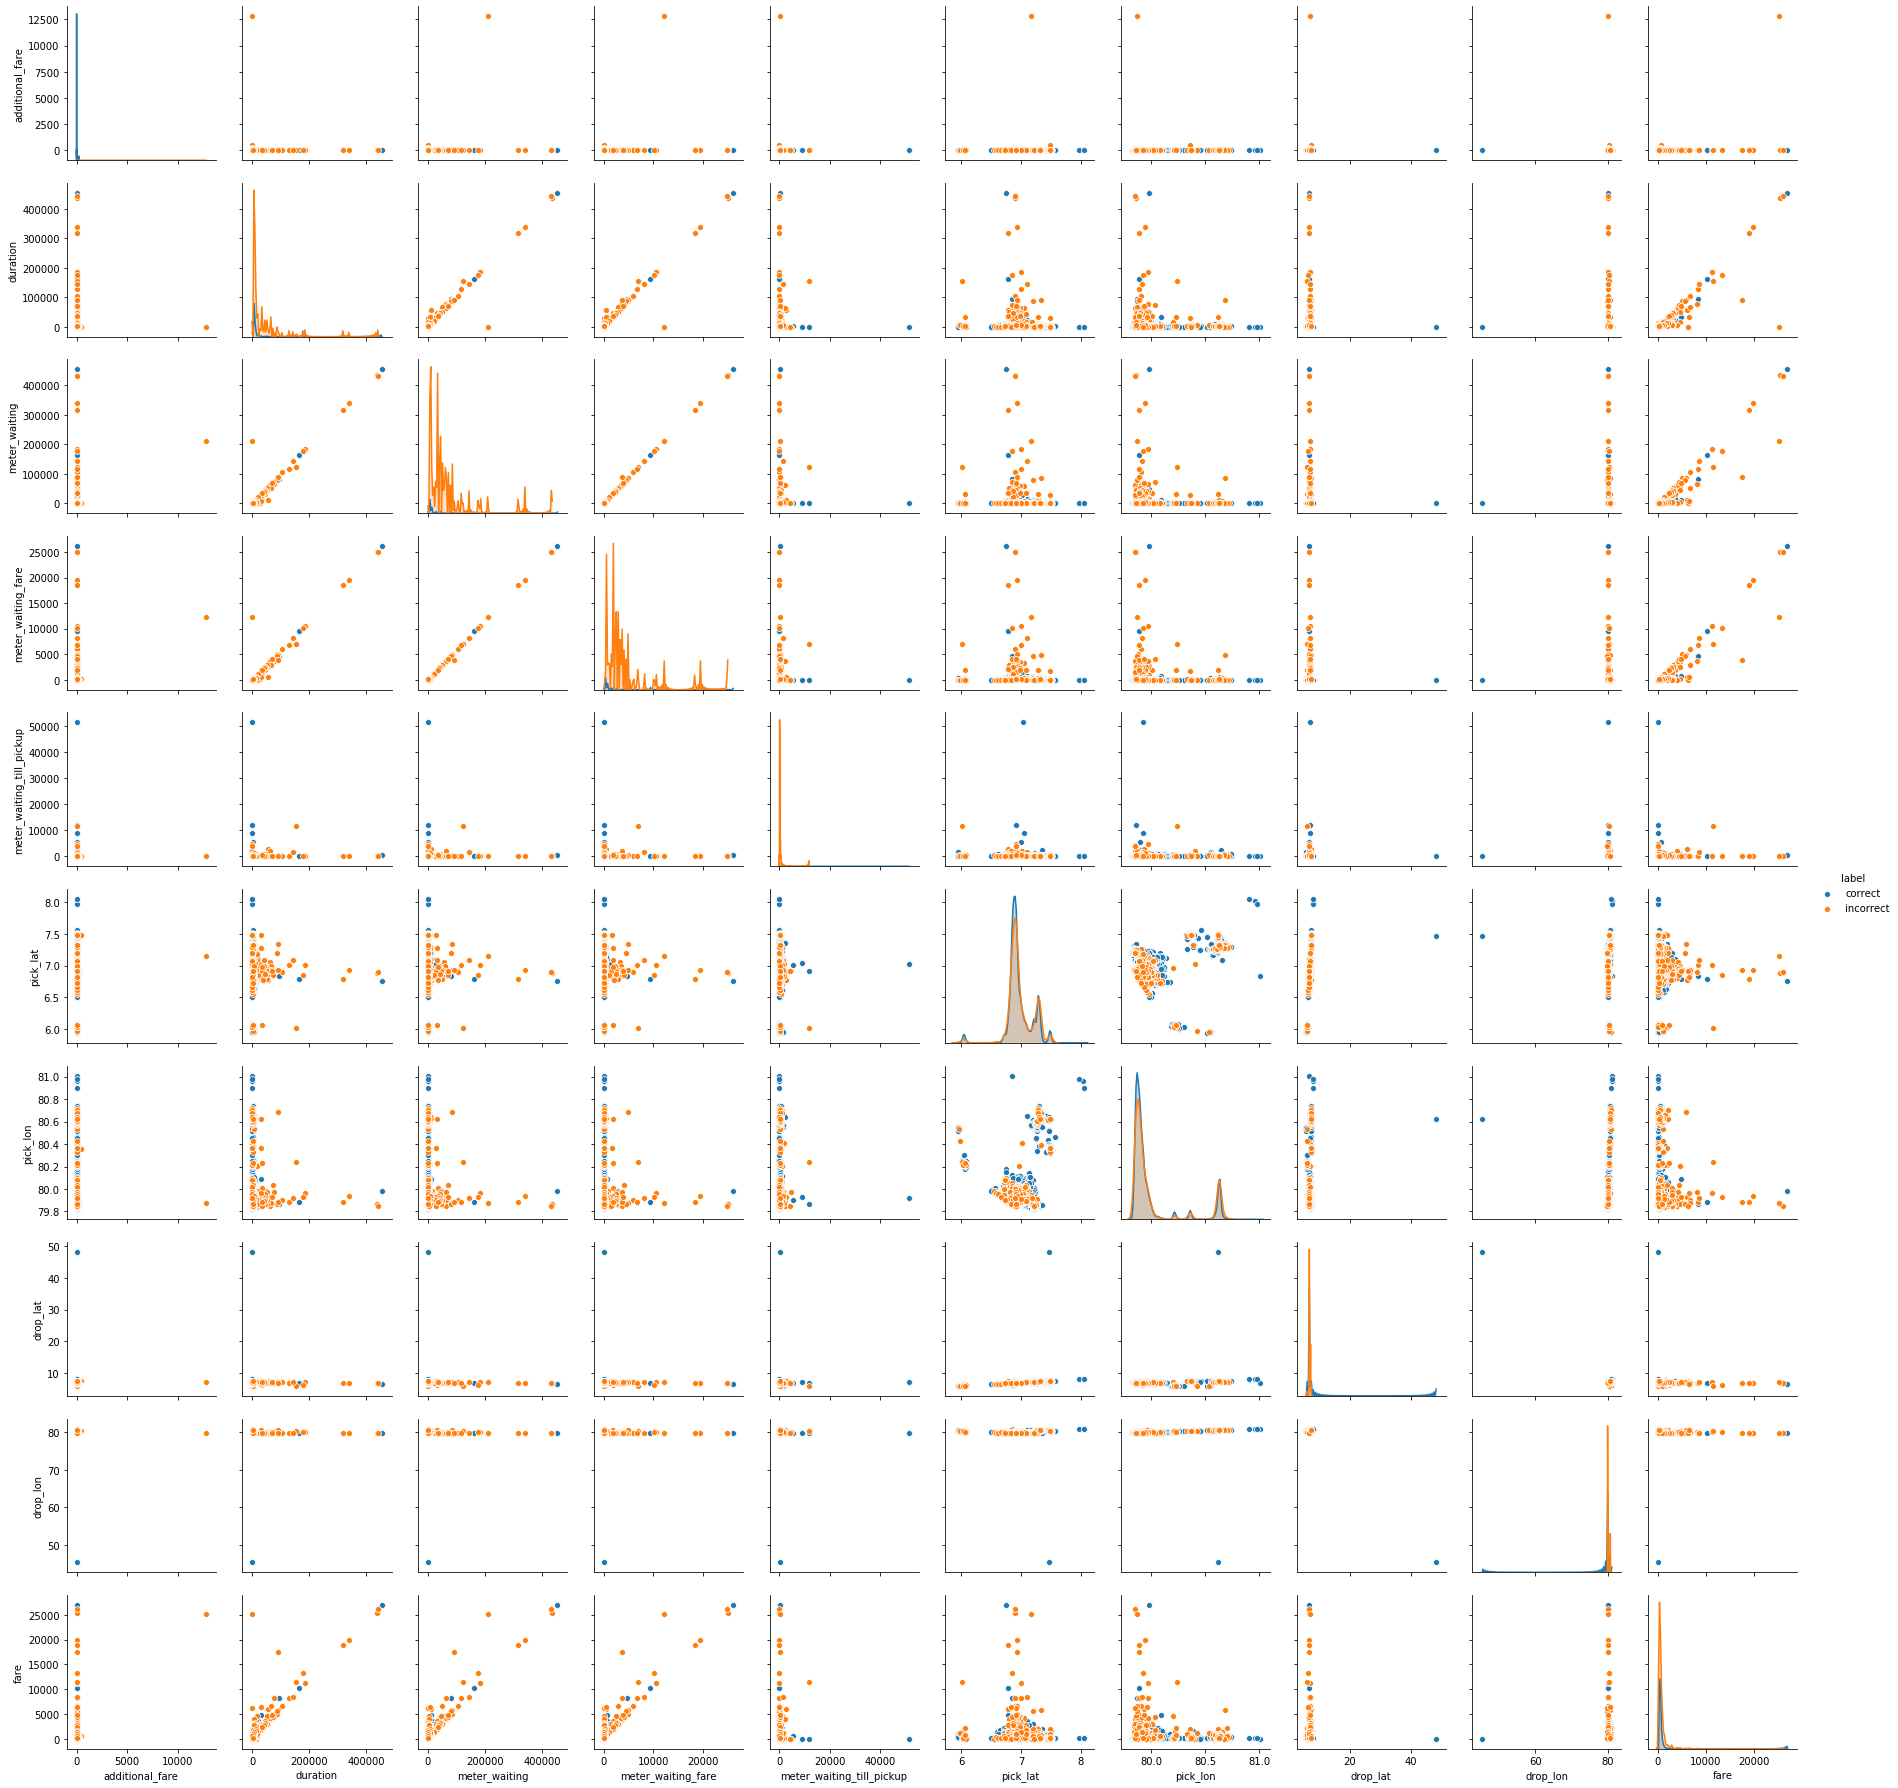

In [62]:
sns.pairplot(data=data,hue='label')

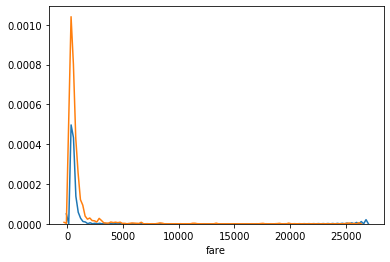

In [75]:
sns.distplot(data[data['label']=='correct']['fare'], hist=False)
sns.distplot(data[data['label']=='incorrect']['fare'], hist=False)

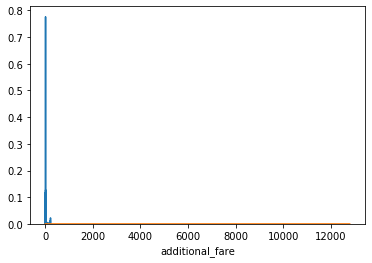

In [76]:
sns.distplot(data[data['label']=='correct']['additional_fare'], hist=False)
sns.distplot(data[data['label']=='incorrect']['additional_fare'], hist=False)

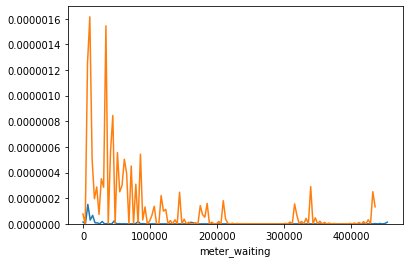

In [77]:
sns.distplot(data[data['label']=='correct']['meter_waiting'], hist=False)
sns.distplot(data[data['label']=='incorrect']['meter_waiting'], hist=False)

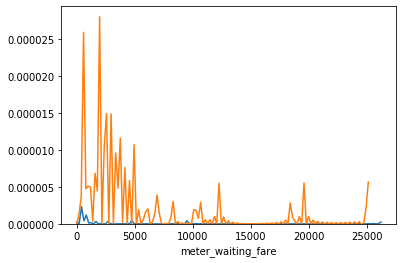

In [78]:
sns.distplot(data[data['label']=='correct']['meter_waiting_fare'], hist=False)
sns.distplot(data[data['label']=='incorrect']['meter_waiting_fare'], hist=False)

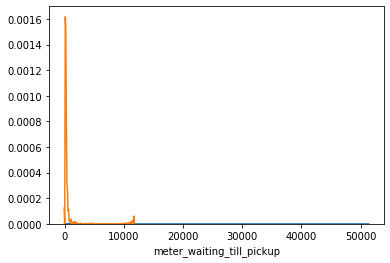

In [81]:
sns.distplot(data[data['label']=='correct']['meter_waiting_till_pickup'], hist=False)
sns.distplot(data[data['label']=='incorrect']['meter_waiting_till_pickup'], hist=False)

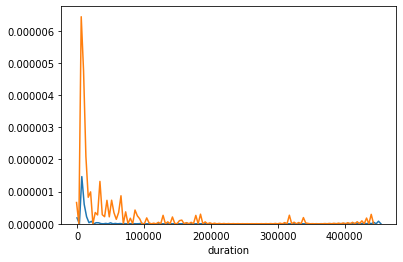

In [74]:
sns.distplot(data[data['label']=='correct']['duration'], hist=False)
sns.distplot(data[data['label']=='incorrect']['duration'], hist=False)